In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

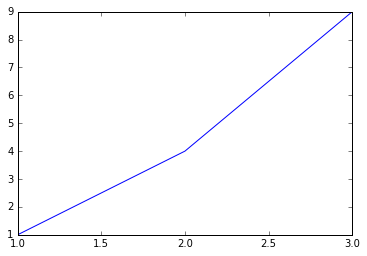

In [2]:
plt.plot([1,2,3], [1,4,9])
plt.show()

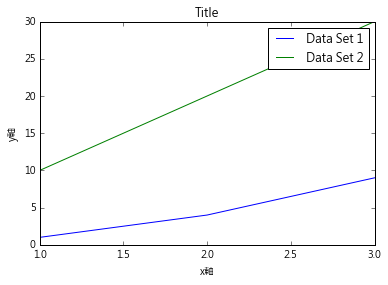

In [3]:
matplotlib.rc('font', **{'family':'Microsoft JhengHei'})
plt.xlabel(u'x軸')
plt.ylabel(u'y軸')
plt.title('Title')
plt.plot([1,2,3], [1,4,9])
plt.plot([1,2,3], [10,20,30])
plt.legend(['Data Set 1','Data Set 2'])
# plt.legend() takes a list as an argment
plt.show()

## Using Pandas

In [4]:
import pandas as pd

In [5]:
data = { 'year':[2008 , 2012, 2016],
       'attendees':[112 , 321, 729],
       'average age':[24, 43, 31]}
df = pd.DataFrame(data)

In [6]:
df

,attendees,average age,year
0,112,24,2008
1,321,43,2012
2,729,31,2016


In [7]:
df['year'] < 2013

0     True
1     True
2    False
Name: year, dtype: bool

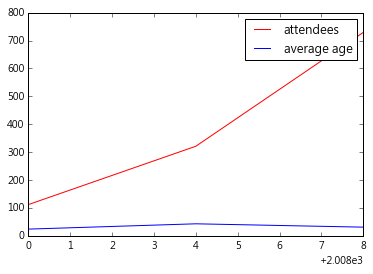

In [8]:
plt.plot(df['year'], df['attendees'], c='r')
plt.plot(df['year'], df['average age'])
plt.legend(['attendees','average age'])
plt.show()

In [9]:
df.shape
present_year = df.set_index('year')

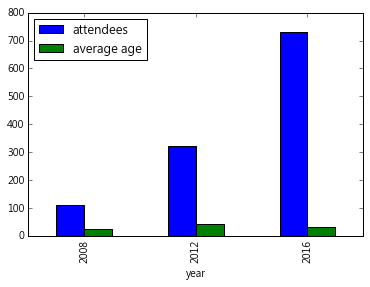

In [10]:
present_year.plot(kind='bar')
plt.show()

## Importing Data with Pandas

In [11]:
data = pd.read_csv('../data/countries.csv')
data.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


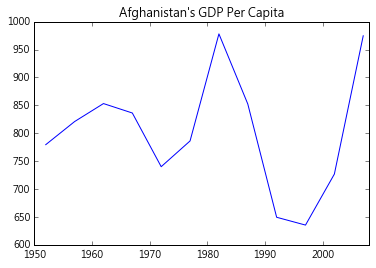

In [12]:
afghanistan = data[data.country == 'Afghanistan']
plt.plot(afghanistan.year, afghanistan.gdpPerCapita)
plt.title("Afghanistan's GDP Per Capita")
plt.xlim(1950,2008)
plt.show()

## problem: Comparing Asia and Europe's GDP Per Capita in 2007

In [13]:
data.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [14]:
# 看看有幾洲
set(data.continent)

{'Africa', 'Americas', 'Asia', 'Europe', 'Oceania'}

In [15]:
# 只看 2007
data_2007 = data[data.year == 2007]
data_2007.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
11,Afghanistan,Asia,2007,43.828,31889923,974.580338
23,Albania,Europe,2007,76.423,3600523,5937.029526
35,Algeria,Africa,2007,72.301,33333216,6223.367465
47,Angola,Africa,2007,42.731,12420476,4797.231267
59,Argentina,Americas,2007,75.320,40301927,12779.379640


In [16]:
# 只看 Asia 與 Europe 的比較
asia_2007 = data_2007[data_2007.continent == 'Asia']
europe_2007 = data_2007[data_2007.continent == 'Europe']
europe_2007.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
23,Albania,Europe,2007,76.423,3600523,5937.029526
83,Austria,Europe,2007,79.829,8199783,36126.492700
119,Belgium,Europe,2007,79.441,10392226,33692.605080
155,Bosnia and Herzegovina,Europe,2007,74.852,4552198,7446.298803
191,Bulgaria,Europe,2007,73.005,7322858,10680.792820


In [17]:
set(asia_2007.country)

{'Afghanistan',
 'Bahrain',
 'Bangladesh',
 'Cambodia',
 'China',
 'Hong Kong, China',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Israel',
 'Japan',
 'Jordan',
 'Korea, Dem. Rep.',
 'Korea, Rep.',
 'Kuwait',
 'Lebanon',
 'Malaysia',
 'Mongolia',
 'Myanmar',
 'Nepal',
 'Oman',
 'Pakistan',
 'Philippines',
 'Saudi Arabia',
 'Singapore',
 'Sri Lanka',
 'Syria',
 'Taiwan',
 'Thailand',
 'Vietnam',
 'West Bank and Gaza',
 'Yemen, Rep.'}

In [18]:
print 'Asia Mean GDP:' , asia_2007.gdpPerCapita.mean()
print 'Asia Median GDP:' , asia_2007.gdpPerCapita.median()
print 'Europe Mean GDP:' , europe_2007.gdpPerCapita.mean()
print 'Europe Median GDP:' , europe_2007.gdpPerCapita.median()
print '台灣GDP:', asia_2007[asia_2007.country == 'Taiwan'].gdpPerCapita

Asia Mean GDP: 12473.0268701
Asia Median GDP: 4471.061906
Europe Mean GDP: 25054.4816359
Europe Median GDP: 28054.06579
台灣GDP: 1511    28718.27684
Name: gdpPerCapita, dtype: float64


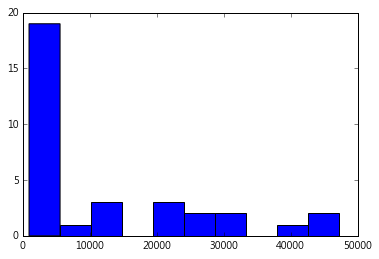

In [19]:
plt.hist(asia_2007.gdpPerCapita, edgecolor='black')
plt.show()

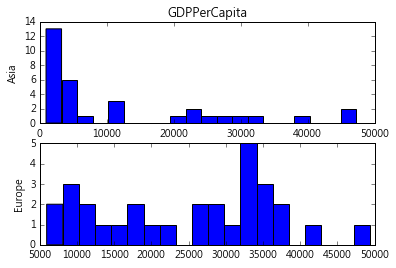

In [20]:
plt.subplot(2, 1, 1)
plt.title('GDPPerCapita')
plt.hist(asia_2007.gdpPerCapita, 20, edgecolor='black')
plt.ylabel('Asia')
plt.subplot(2, 1, 2)
plt.ylabel('Europe')
plt.hist(europe_2007.gdpPerCapita, 20, edgecolor='black')
plt.show()

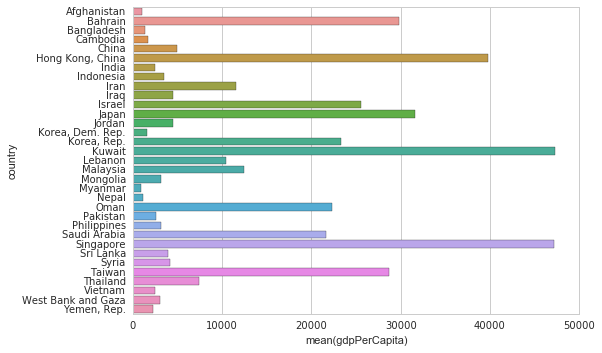

In [26]:
# 記得先 run 下面的 seaborn lib
sns.despine(left=True, bottom=True)
sns.barplot(y="country", x="gdpPerCapita", data=asia_2007);


NameError: name 'g' is not defined

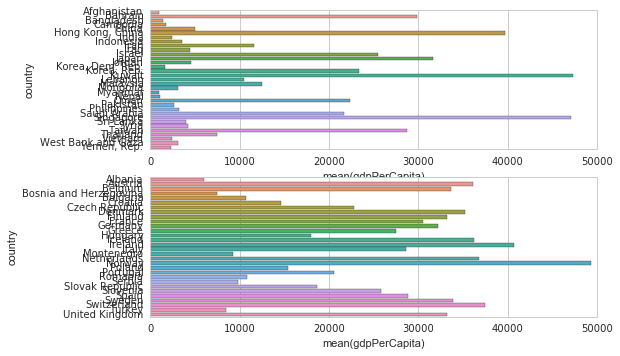

In [27]:
# 使用 seaborn 繪 subplot
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
# Tell pointplot to plot on ax1 with the ax argument

sns.barplot(y="country", x="gdpPerCapita", data=asia_2007, ax=ax1);
sns.barplot(y="country", x="gdpPerCapita", data=europe_2007, ax=ax2);

# Close the FacetGrid figure which we don't need (g.fig)
plt.close(g.fig)

plt.show()

## seaborn Practice

In [23]:
import seaborn as sns
import numpy as np
sns.set(style="whitegrid", color_codes=True)

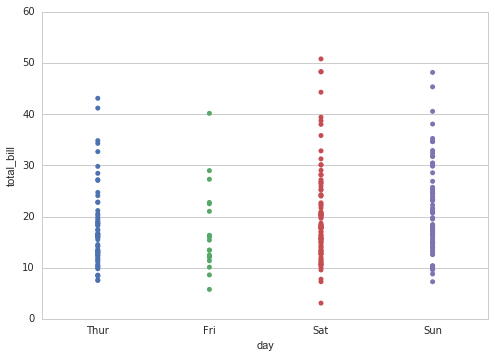

In [24]:
np.random.seed(sum(map(ord, "categorical")))
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")
sns.stripplot(x="day", y="total_bill", data=tips);

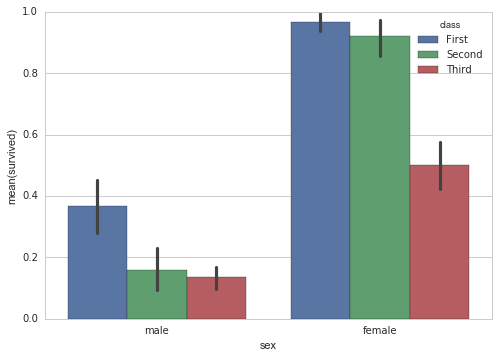

In [25]:
sns.barplot(x="sex", y="survived", hue="class", data=titanic);

## Line Charts
### Problem: Comparing GDP Per Capita Growth in the U.S. and China

In [28]:
us = data[data.country == 'United States']
china = data[data.country == 'China']
us.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
1608,United States,Americas,1952,68.44,157553000,13990.48208
1609,United States,Americas,1957,69.49,171984000,14847.12712
1610,United States,Americas,1962,70.21,186538000,16173.14586
1611,United States,Americas,1967,70.76,198712000,19530.36557
1612,United States,Americas,1972,71.34,209896000,21806.03594


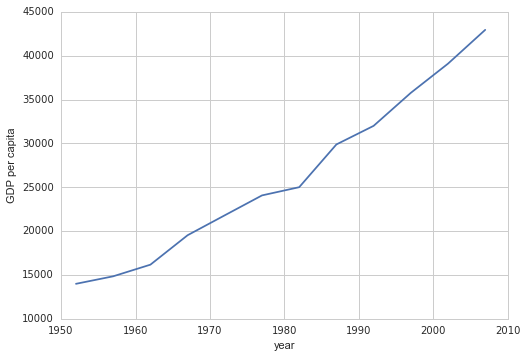

In [29]:
plt.plot(us.year, us.gdpPerCapita)
plt.ylabel('GDP per capita')
plt.xlabel('year')
plt.show()

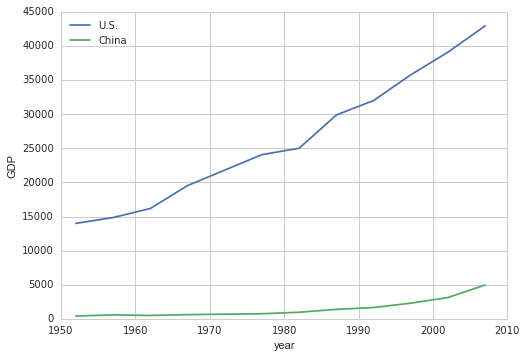

In [30]:
plt.plot(us.year, us.gdpPerCapita, label='U.S.')
plt.plot(china.year, china.gdpPerCapita, label='China')
plt.ylabel('GDP')
plt.xlabel('year')
plt.legend(loc="upper left")
plt.show()

In [31]:
#Pandas 透過使用中括號 [] 與 .iloc 可以很靈活地從 data frame 中選擇想要的元素。
# ex : df.iloc[0:1, 1]) # 第一列第二欄
us.gdpPerCapita.iloc[0]

13990.482080000002

In [32]:
# 以第一筆資料作為起始點, 來看每年的成長比率
us_growth = us.gdpPerCapita / us.gdpPerCapita.iloc[0] * 100
china_growth = china.gdpPerCapita / china.gdpPerCapita.iloc[0] * 100

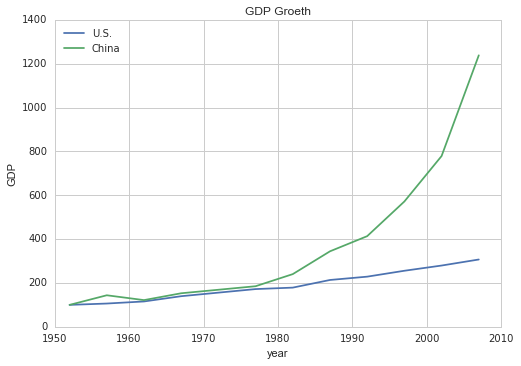

In [33]:
plt.plot(us.year, us_growth, label='U.S.')
plt.plot(china.year, china_growth, label='China')
plt.title('GDP Groeth')
plt.ylabel('GDP')
plt.xlabel('year')
plt.legend(loc="upper left")
plt.show()

### Problem: Find relationship between GDP Per Capita and Life Expectancy

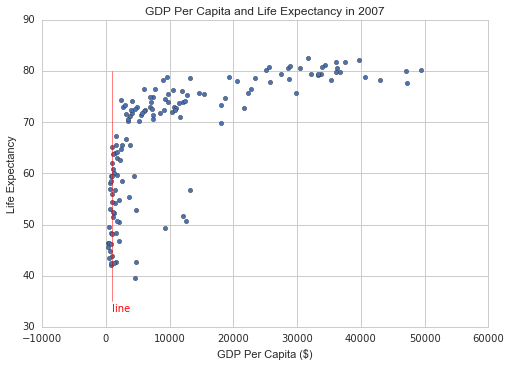

In [34]:
from matplotlib.lines import Line2D
figure, ax = plt.subplots()
plt.scatter(data_2007.gdpPerCapita, data_2007.lifeExpectancy)
plt.title('GDP Per Capita and Life Expectancy in 2007')
plt.xlabel('GDP Per Capita ($)')
plt.ylabel('Life Expectancy')
# 加一對比用直線
line1 = [(1000,35),(1000,80)]
(line1_xs, line1_ys) = zip(*line1)
ax.add_line(Line2D(line1_xs, line1_ys, linewidth=.5, color='red'))
plt.text(1050, 33, r'line',color='red', fontsize=10)
plt.plot()

plt.show()

In [35]:
#Compute correlation
data_2007.gdpPerCapita.corr(data_2007.lifeExpectancy)

0.67866239867775879

In [36]:
# 散佈區間在0-10000太密集，縮小比例尺看看, 使用 log
print "看看 log 函數：", np.log10([10,100,1000])


看看 log 函數： [ 1.  2.  3.]


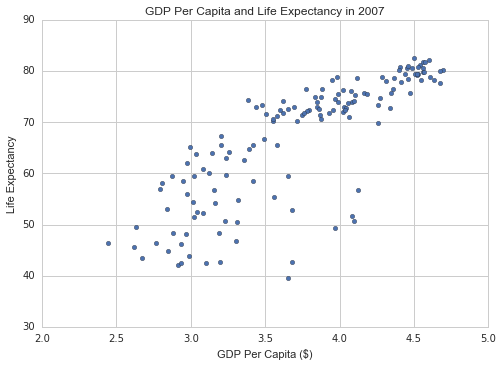

In [37]:
plt.scatter(np.log10(data_2007.gdpPerCapita), data_2007.lifeExpectancy)
plt.title('GDP Per Capita and Life Expectancy in 2007')
plt.xlabel('GDP Per Capita ($)')
plt.ylabel('Life Expectancy')
plt.show()
# 這樣看起來也比較好做 linear regression

In [38]:
#相關性也提高了
np.log10(data_2007.gdpPerCapita).corr(data_2007.lifeExpectancy)

0.80898025148492136

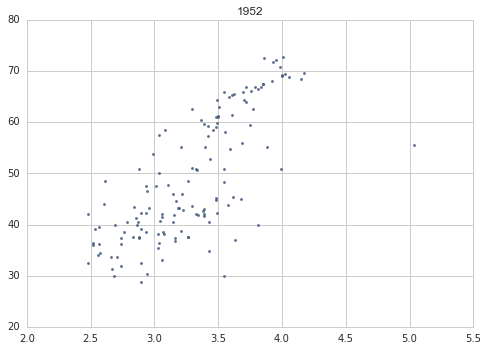

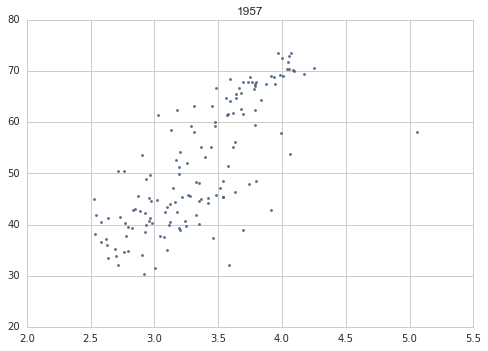

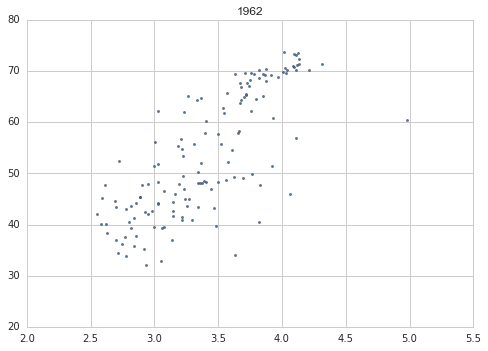

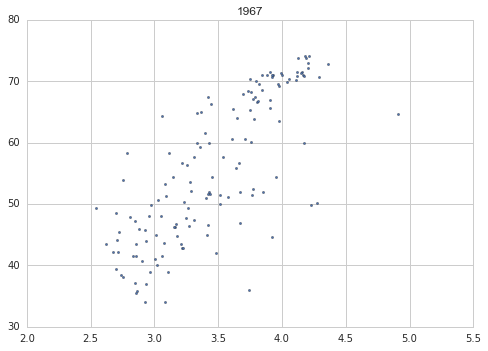

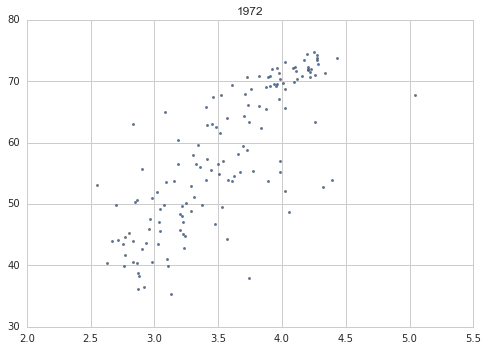

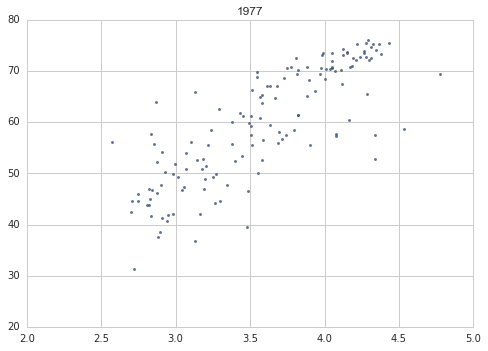

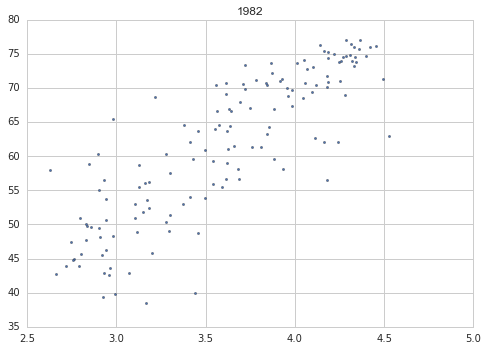

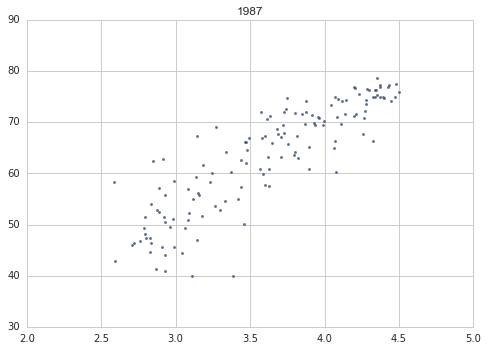

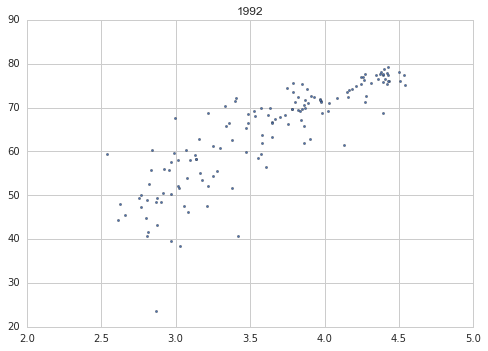

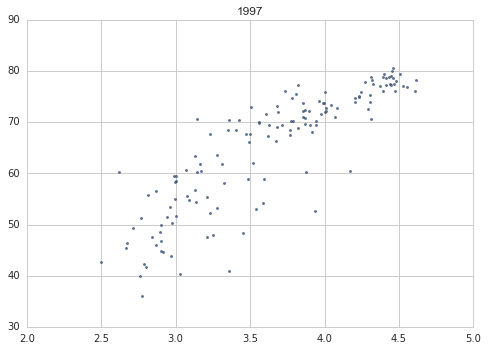

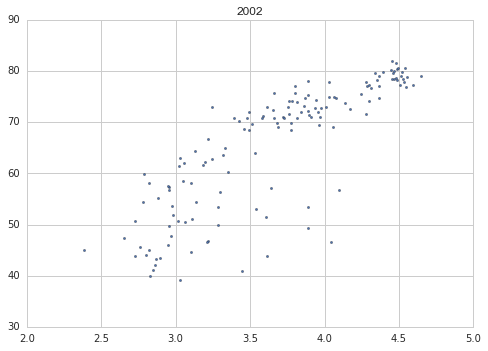

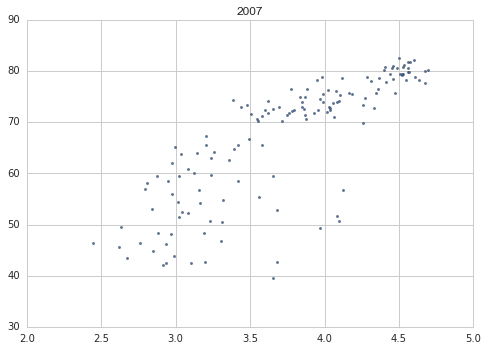

In [39]:
years_sorted = sorted(set(data.year))
for given_year in years_sorted:
    data_year = data[data.year == given_year]
    plt.scatter(np.log10(data_year.gdpPerCapita),data_year.lifeExpectancy, 5)  # 5是點的大小
    plt.title(given_year)
    plt.show()

### Problem: Comparing the population of 10 most populous Contries in 2007 


In [40]:
top10 = data_2007.sort_values('population', ascending=False).head(10)

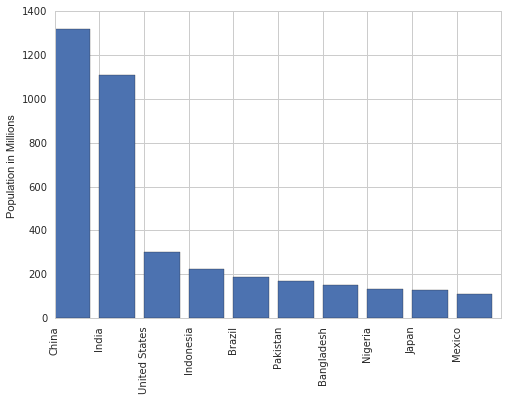

In [41]:
x = range(10)
plt.bar(x, top10.population / 10**6)  # 10**6 後比較好閱讀數值
plt.xticks(x , top10.country, rotation='vertical')
plt.ylabel('Population in Millions')
plt.show()

### Compare the GDP of the 10 most populous countries in 2007

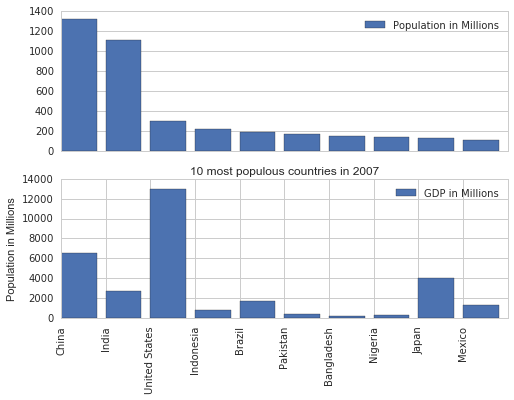

In [42]:
plt.subplot(2, 1, 1)
plt.bar(x, top10.population / 10**6)  # 10**6 後比較好閱讀數值
plt.xticks([], [])
plt.legend(['Population in Millions'])

plt.subplot(2, 1, 2)
plt.bar(x, top10.gdpPerCapita*top10.population / 10**9) 
plt.xticks(x , top10.country, rotation='vertical')
plt.ylabel('Population in Millions')
plt.legend(['GDP in Millions'])

plt.title('10 most populous countries in 2007')
plt.show()

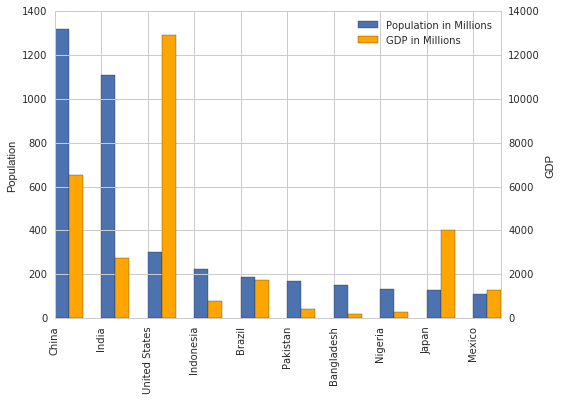

In [43]:
#合在一張圖解讀
figure, ax1 = plt.subplots()
# np.arange(10) is similar to range(10), and it allows us to shift
# each value in it by the bar width as you can see below.
x = np.arange(10)
width=0.3
plt.xticks(x, top10.country, rotation='vertical')
population = ax1.bar(x, top10.population/10**6, width)
plt.ylabel('Population')
ax2 = ax1.twinx()  # ax2與 ax1同一個 X軸
gdp = ax2.bar(x + width, top10.gdpPerCapita*top10.population/ 10**9, width, color='orange')
plt.ylabel('GDP')
plt.legend([population,gdp],['Population in Millions','GDP in Millions'])
figure = plt.gcf()  #get current figure
plt.show()



### What to Do When Your Data Is Too Big
Data Aggregation and sampling

In [44]:
#Data Aggregation Example

obama_data = pd.read_csv('../data/obama.csv',parse_dates=['year_month'])  # parse_dates：嘗試為數據解析為日期，這裡原來的2009-02轉成像2009-02-1
obama_data.head()

,year_month,survey_organization,approve_percent,disapprove_percent
0,2009-01-01,ABC/Post,80.0,15.0
1,2009-01-01,AP-GFK,74.0,15.0
2,2009-01-01,CNN,84.0,14.0
3,2009-01-01,Democracy Corps (D),51.0,20.0
4,2009-01-01,Diageo/Hotline,64.0,6.5


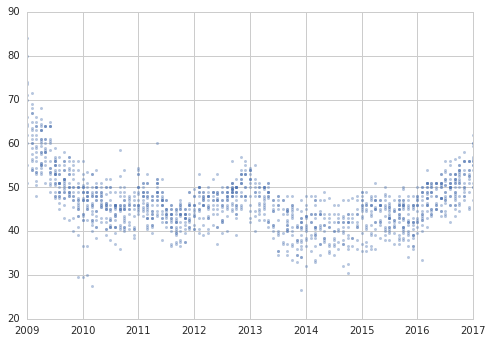

In [53]:
plt.plot(obama_data.year_month, obama_data.approve_percent, 'o', markersize=3, alpha=0.4)
plt.show()

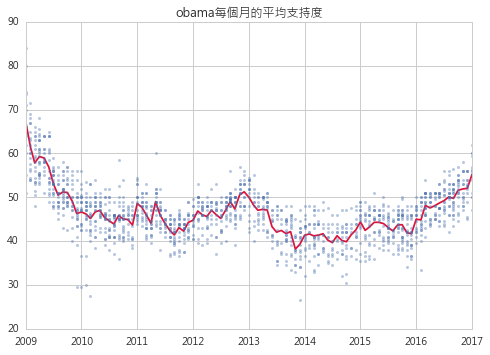

In [66]:
matplotlib.rc('font', **{'family':'Microsoft JhengHei'})
obama_data_mean = obama_data.groupby('year_month').mean()
plt.plot(obama_data_mean.index, obama_data_mean.approve_percent, 'crimson')
plt.title(u'obama每個月的平均支持度')
plt.plot(obama_data.year_month, obama_data.approve_percent, 'o', markersize=3, alpha=0.4)
plt.show()

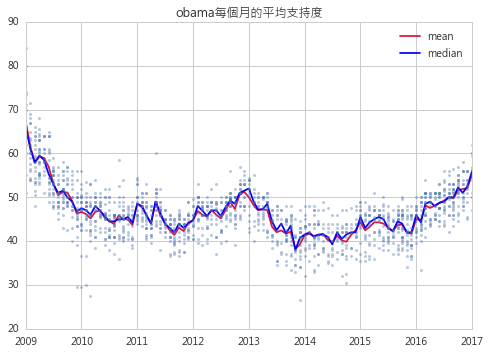

In [70]:
obama_data_median = obama_data.groupby('year_month').median()
plt.plot(obama_data_mean.index, obama_data_mean.approve_percent, 'crimson')
plt.plot(obama_data_median.index, obama_data_median.approve_percent, 'blue')
plt.legend(['mean','median'])
plt.title(u'obama每個月的平均支持度')
plt.plot(obama_data.year_month, obama_data.approve_percent, 'o', markersize=3, alpha=0.4)
plt.show()

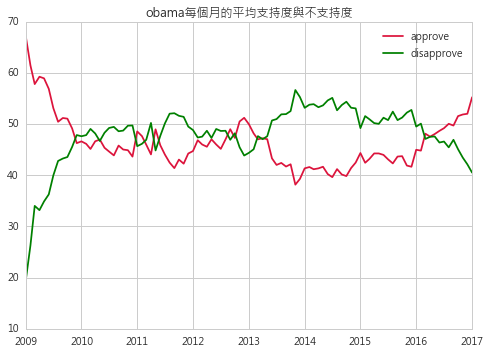

In [67]:
obama_data_mean = obama_data.groupby('year_month').mean()
plt.plot(obama_data_mean.index, obama_data_mean.approve_percent, 'crimson')

plt.plot(obama_data_mean.index, obama_data_mean.disapprove_percent, 'green')
plt.title(u'obama每個月的平均支持度與不支持度')
plt.legend(['approve','disapprove'])
plt.show()

### A Random Sampling Example

In [71]:
obama_bigdata = pd.read_csv('../data/obama_too_big.csv',parse_dates=['year_month'])
obama_bigdata.head()

,year_month,survey_organization,approve_percent,disapprove_percent
0,2009-01-01,Generated Data,67.0,31.0
1,2009-01-01,Harris (Phone),60.0,29.0
2,2009-01-01,Generated Data,65.9,19.1
3,2009-01-01,Generated Data,64.6,18.4
4,2009-01-01,Generated Data,83.3,11.7


In [72]:
print obama_data.shape
print obama_bigdata.shape

(1530, 4)
(65499, 4)


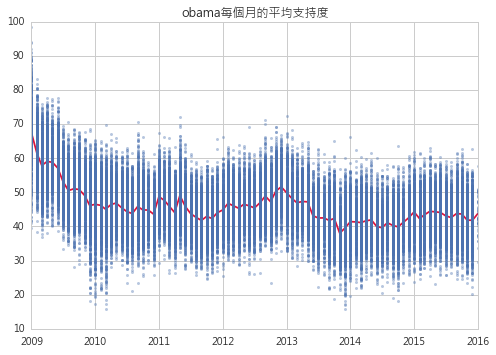

In [73]:
obama_bigdata_mean = obama_bigdata.groupby('year_month').mean()
plt.plot(obama_bigdata_mean.index, obama_bigdata_mean.approve_percent, 'crimson')
plt.title(u'obama每個月的平均支持度')
plt.plot(obama_bigdata.year_month, obama_bigdata.approve_percent, 'o', markersize=3, alpha=0.4)
plt.show()

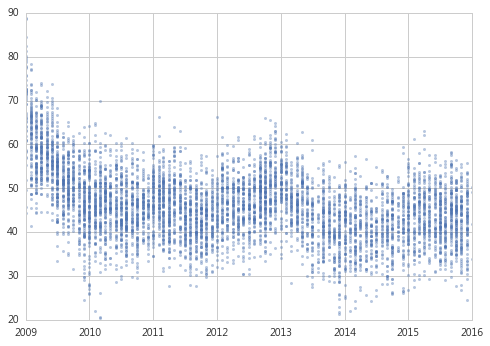

In [74]:
sampled = obama_bigdata.sample(frac=0.1)  # 亦可使用 (n=10000)
plt.plot(sampled.year_month, sampled.approve_percent, 'o', markersize=3, alpha=0.4)
plt.show()

In [75]:
sampled.shape

(6550, 4)

## Solving Real-world Problems with Visualization

In [76]:
data = pd.read_csv('../data/countries.csv')
data.groupby(['country']).mean()

,year,lifeExpectancy,population,gdpPerCapita
country,,,,
Afghanistan,1979.5,37.478833,1.582372e+07,802.674598
Albania,1979.5,68.432917,2.580249e+06,3255.366633
Algeria,1979.5,59.030167,1.987541e+07,4426.025973
Angola,1979.5,37.883500,7.309390e+06,3607.100529
Argentina,1979.5,69.060417,2.860224e+07,8955.553783
Australia,1979.5,74.662917,1.464931e+07,19980.595634
Austria,1979.5,73.103250,7.583298e+06,20411.916279
Bahrain,1979.5,65.605667,3.739132e+05,18077.663945
Bangladesh,1979.5,49.834083,9.075540e+07,817.558818


In [95]:
mean_gdp_per_capita = data.groupby(['country']).mean().gdpPerCapita
top5 = mean_gdp_per_capita.sort_values(ascending=False).head()
top5
# Kuwait(科威特)的數據特別高, why?

country
Kuwait           65332.910472
Switzerland      27074.334405
Norway           26747.306554
United States    26261.151347
Canada           22410.746340
Name: gdpPerCapita, dtype: float64

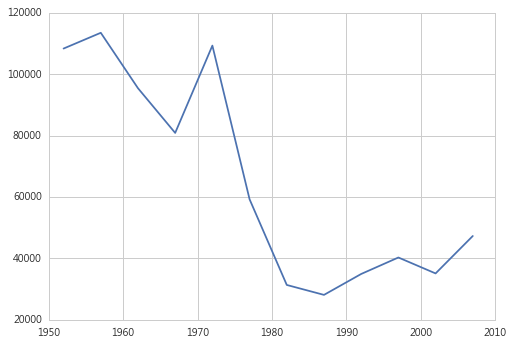

In [83]:
kuwait = data[data.country == 'Kuwait']
plt.plot(kuwait.year, kuwait.gdpPerCapita)
plt.show()
# 在 197x-1980迅速下滑，發生了什麼事？

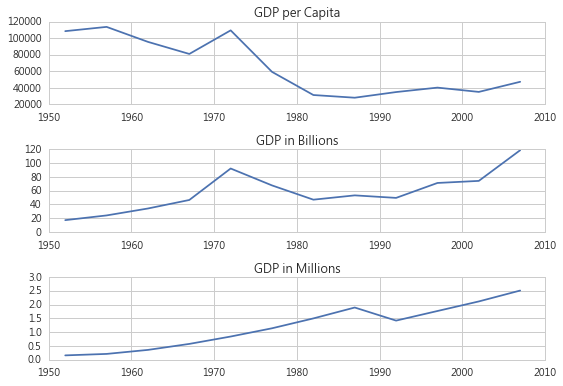

In [85]:
plt.subplot(311)
plt.title('GDP per Capita')
plt.plot(kuwait.year, kuwait.gdpPerCapita)

plt.subplot(312)
plt.title('GDP in Billions')
plt.plot(kuwait.year, kuwait.population*kuwait.gdpPerCapita / 10**9)

plt.subplot(313)
plt.title('GDP in Millions')
plt.plot(kuwait.year, kuwait.population / 10**6)

plt.tight_layout()
plt.show()

# 原來是因為人口上揚

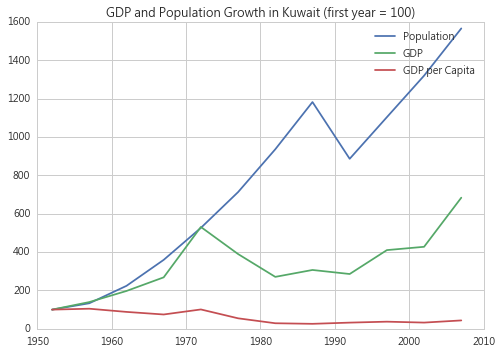

In [89]:
plt.plot(kuwait.year, kuwait.population / kuwait.population.iloc[0] * 100)

kuwait_gdp = kuwait.population*kuwait.gdpPerCapita 
plt.plot(kuwait.year, kuwait_gdp / kuwait_gdp.iloc[0] * 100)
plt.plot(kuwait.year, kuwait.gdpPerCapita / kuwait.gdpPerCapita.iloc[0] * 100)  
plt.title('GDP and Population Growth in Kuwait (first year = 100)')
plt.legend(['Population', 'GDP', 'GDP per Capita'])
plt.show()

In [99]:
kuwait_gdp
#(kuwait_gdp /10**7).mean()

852    1.734118e+10
853    2.416294e+10
854    3.419940e+10
855    4.651480e+10
856    9.206369e+10
857    6.758380e+10
858    4.695248e+10
859    5.318564e+10
860    4.953820e+10
861    7.114450e+10
862    7.413713e+10
863    1.185305e+11
dtype: float64

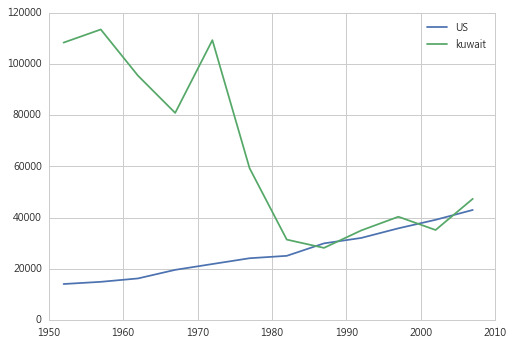

In [98]:
us = data[data.country == 'United States']
plt.plot(us.year, us.gdpPerCapita)
plt.plot(kuwait.year, kuwait.gdpPerCapita)
plt.legend(['US', 'kuwait'])
plt.show()

## Is Kuwait really the richest country in the world (on a per-person basis?)
可以看出來198x 年之後, Kuwait 的數據比較符合真實